In [5]:
# Useful starting lines
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


# Cross-Validation and Bias-Variance decomposition
## Cross-Validation
Implementing 4-fold cross-validation below:

In [6]:
from helpers import load_data

# load dataset
x, y = load_data()

In [7]:
print(x.shape)
print(y.shape)

(50,)
(50,)


In [8]:
def build_k_indices(y, k_fold, seed):
    """build k indices for k-fold."""
    num_row = y.shape[0]
    interval = int(num_row / k_fold)
    np.random.seed(seed)
    indices = np.random.permutation(num_row)
    k_indices = [indices[k * interval: (k + 1) * interval]
                 for k in range(k_fold)]
    return np.array(k_indices)

In [9]:
from costs import compute_mse
from ridge_regression import ridge_regression
from build_polynomial import build_poly

def cross_validation(y, x, k_indices, k, lambda_, degree):
    """return the loss of ridge regression."""
    # ***************************************************
    # INSERT YOUR CODE HERE
    # get k'th subgroup in test, others in train: TODO
    # ***************************************************
    test_indices = k_indices[k]
    train_indices = np.vstack((k_indices[:k], k_indices[k + 1:])).ravel()
    
    y_test = y[test_indices]
    x_test = x[test_indices]
    
    y_train = y[train_indices]
    x_train = x[train_indices]
    
    # ***************************************************
    # INSERT YOUR CODE HERE
    # form data with polynomial degree: TODO
    # ***************************************************
    x_test_poly = build_poly(x_test, degree)
    x_train_poly = build_poly(x_train, degree)
    
    # ***************************************************
    # INSERT YOUR CODE HERE
    # ridge regression: TODO
    # ***************************************************
    w = ridge_regression(y_train, x_train_poly, lambda_)
    
    # ***************************************************
    # INSERT YOUR CODE HERE
    # calculate the loss for train and test data: TODO
    # ***************************************************
    loss_tr = compute_mse(y_train, x_train_poly, w)
    loss_te = compute_mse(y_test, x_test_poly, w)
    
    return loss_tr, loss_te

Train: lambda = 0.0001, with k_fold = 4, RMSE Variance = 8.5241258738639e-05
Test: lambda = 0.0001, with k_fold = 4, RMSE Variance = 0.0010555009520444056

Train: lambda = 0.00013738237958832623, with k_fold = 4, RMSE Variance = 8.183922118483884e-05
Test: lambda = 0.00013738237958832623, with k_fold = 4, RMSE Variance = 0.0010247041622390377

Train: lambda = 0.00018873918221350977, with k_fold = 4, RMSE Variance = 7.896847954668336e-05
Test: lambda = 0.00018873918221350977, with k_fold = 4, RMSE Variance = 0.0009831794404515834

Train: lambda = 0.0002592943797404667, with k_fold = 4, RMSE Variance = 7.638726343248492e-05
Test: lambda = 0.0002592943797404667, with k_fold = 4, RMSE Variance = 0.0009299371000829836

Train: lambda = 0.0003562247890262444, with k_fold = 4, RMSE Variance = 7.383836914421508e-05
Test: lambda = 0.0003562247890262444, with k_fold = 4, RMSE Variance = 0.0008654118674269596

Train: lambda = 0.0004893900918477494, with k_fold = 4, RMSE Variance = 7.10749412668034

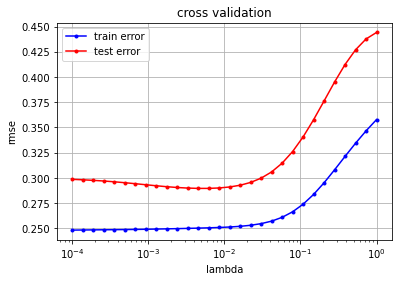

In [12]:
from plots import cross_validation_visualization

def cross_validation_demo():
    seed = 1
    degree = 7
    k_fold = 4
    lambdas = np.logspace(-4, 0, 30)
    # split data in k fold
    k_indices = build_k_indices(y, k_fold, seed)
    # define lists to store the loss of training data and test data
    rmse_tr = []
    rmse_te = []
    # ***************************************************
    # INSERT YOUR CODE HERE
    # cross validation: TODO
    # ***************************************************
    for lambda_ in lambdas:
        rmse_tr_arr = np.empty(k_fold)
        rmse_te_arr = np.empty(k_fold)
        for k in range(k_fold):
            loss_tr, loss_te = cross_validation(y, x, k_indices, k, lambda_, degree)
            rmse_tr_arr[k] = np.sqrt(2 * loss_tr)
            rmse_te_arr[k] = np.sqrt(2 * loss_te)
            
        rmse_tr.append(np.mean(rmse_tr_arr))
        print("Train: lambda = {lam}, with k_fold = {k_fold}, RMSE Variance = {var}"
              .format(lam = lambda_, k_fold = k_fold, var=np.var(rmse_tr_arr)))
        
        rmse_te.append(np.mean(rmse_te_arr))
        print("Test: lambda = {lam}, with k_fold = {k_fold}, RMSE Variance = {var}"
              .format(lam = lambda_, k_fold = k_fold, var=np.var(rmse_te_arr)))
        print()
        
    cross_validation_visualization(lambdas, rmse_tr, rmse_te)

cross_validation_demo()

## Bias-Variance Decomposition
Visualize bias-variance trade-off by implementing the function `bias_variance_demo()` below:

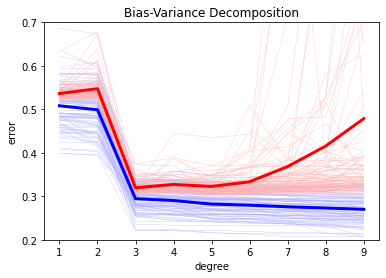

In [14]:
from least_squares import least_squares
from split_data import split_data
from plots import bias_variance_decomposition_visualization

def bias_variance_demo():
    """The entry."""
    # define parameters
    seeds = range(100)
    num_data = 10000
    ratio_train = 0.005
    degrees = range(1, 10)
    lambda_ = 0.01
    
    # define list to store the variable
    rmse_tr = np.empty((len(seeds), len(degrees)))
    rmse_te = np.empty((len(seeds), len(degrees)))
    
    for index_seed, seed in enumerate(seeds):
        np.random.seed(seed)
        x = np.linspace(0.1, 2 * np.pi, num_data)
        y = np.sin(x) + 0.3 * np.random.randn(num_data).T
        # ***************************************************
        # INSERT YOUR CODE HERE
        # split data with a specific seed: TODO
        # ***************************************************
        x_train, y_train, x_test, y_test = split_data(x, y, ratio_train, seed)
        
        # ***************************************************
        # INSERT YOUR CODE HERE
        # bias_variance_decomposition: TODO
        # ***************************************************
        for index_degree, degree in enumerate(degrees):
            x_train_poly = build_poly(x_train, degree)
            x_test_poly = build_poly(x_test, degree)
            
#             loss_tr, w = least_squares(y_train, x_train_poly)
            w = ridge_regression(y_train, x_train_poly)
            loss_te = compute_mse(y_test, x_test_poly, w)
            
            rmse_tr[index_seed, index_degree] = np.sqrt(2 * loss_tr)
            rmse_te[index_seed, index_degree] = np.sqrt(2 * loss_te)

    bias_variance_decomposition_visualization(degrees, rmse_tr, rmse_te)

bias_variance_demo()